In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import scipy.special as sp

In [2]:
nside = 256
npix = hp.nside2npix(nside)
lmax = 3.*nside-1.

In [3]:
# Generate a Gaussian and an exponential one-point pixel distribution function, both sigma=1
gauss = np.random.randn(npix)
expon = np.random.exponential(size=npix)

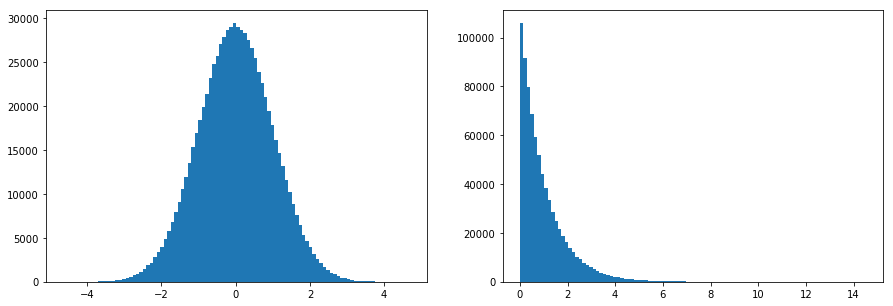

In [4]:
plt.figure(figsize=[15,5])
plt.clf()
plt.subplot(121)
plt.hist(gauss,bins=100)
plt.subplot(122)
plt.hist(expon,bins=100)
plt.show()

('Gaussian variance', 1.0023696052066393)
('Exponential variance', 1.0009263861841309)


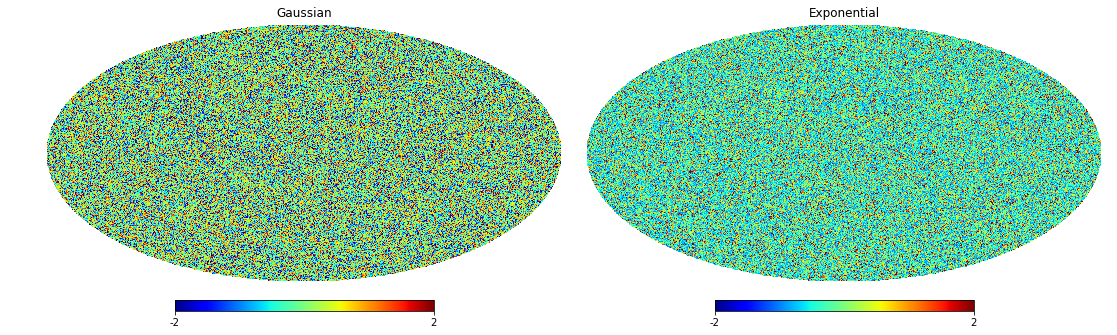

In [8]:
print('Gaussian variance',np.var(gauss))
print('Exponential variance',np.var(expon))
plt.figure(figsize=[15,5])
plt.clf()
hp.mollview(gauss-gauss.mean(),sub=121,title='Gaussian',min=-2,max=2)
hp.mollview(expon-expon.mean(),sub=122,title='Exponential',min=-2,max=2)
plt.show()

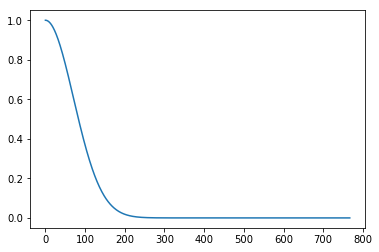

In [9]:
# Impose a correlation function
ell = np.arange(lmax+1)
C_l = np.exp(-np.power(ell/100.,2))
plt.figure()
plt.clf()
plt.plot(ell,C_l)
plt.show()
l,m = hp.Alm.getlm(lmax)

In [10]:
def angcorrmap(_mp,_cl,lmax=None):
    mp = _mp.copy()
    cl = _cl.copy()
    var = np.var(mp)
    nside = hp.npix2nside(len(mp))
    alm = hp.map2alm(mp,lmax=lmax)
    l,m = hp.Alm.getlm(lmax)
    l = np.array(l,dtype='int64')
    f = cl[l]+0*1j # Assign the cl to filter the appropriate l
    fmp_u = hp.alm2map(f*alm,int(nside),lmax=int(lmax)) # Jesus Hairy Balls!
    var_u = np.var(fmp_u)
    fmp = (fmp_u*np.sqrt(var/var_u)).real
    return fmp

In [11]:
fgauss = angcorrmap(gauss,C_l,lmax=lmax)
fexpon = angcorrmap(expon,C_l,lmax=lmax)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


('Gaussian variance', 1.0023696052066391)
('Exponential variance', 1.0009263861841309)


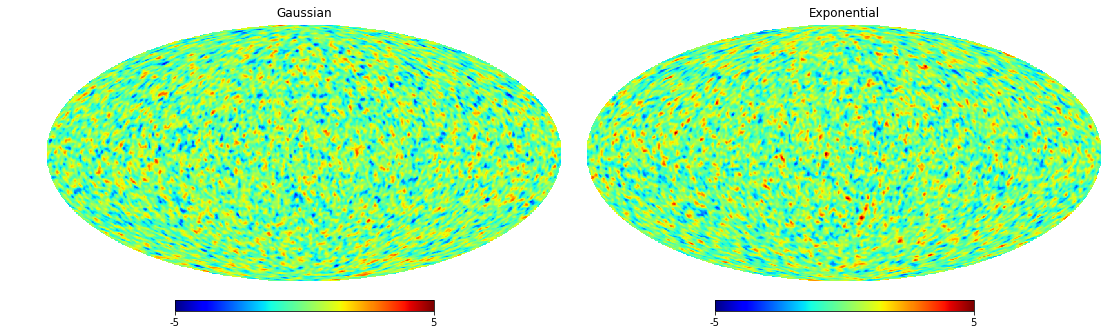

In [18]:
print('Gaussian variance',np.var(fgauss))
print('Exponential variance',np.var(fexpon))
plt.figure(figsize=[15,5])
plt.clf()
hp.mollview(fgauss-fgauss.mean(),sub=121,title='Gaussian',min=-5,max=5)
hp.mollview(fexpon-fexpon.mean(),sub=122,title='Exponential',min=-5,max=5)
plt.show()

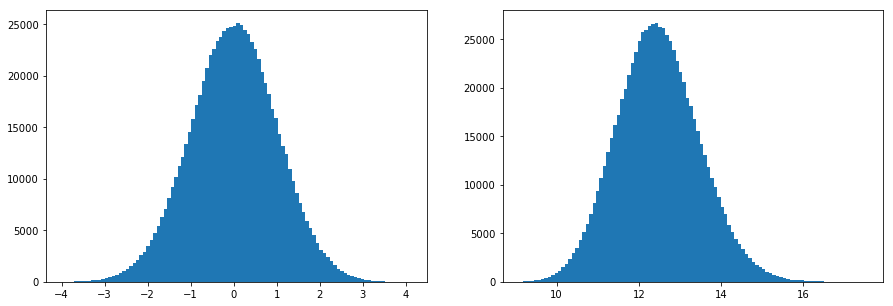

In [19]:
plt.figure(figsize=[15,5])
plt.clf()
plt.subplot(121)
plt.hist(fgauss,bins=100)
plt.subplot(122)
plt.hist(fexpon,bins=100)
plt.show()

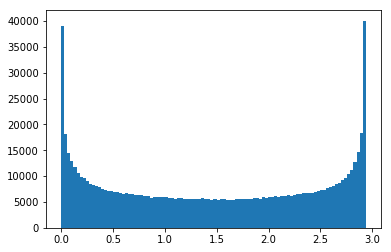

In [20]:
# can the pixel distribution be re-transformed without affecting the spatial correlation?
maybe = fgauss.copy()
maybe -= fgauss.mean()
maybe /= fgauss.std()
maybe = sp.erfc(maybe)
maybe *= np.std(fgauss)/np.std(maybe)
plt.figure()
plt.clf()
plt.hist(maybe,bins=100)
plt.show()

('Gaussian variance', 1.0023696052066391)
('Uniform variance', 1.0023696052066386)


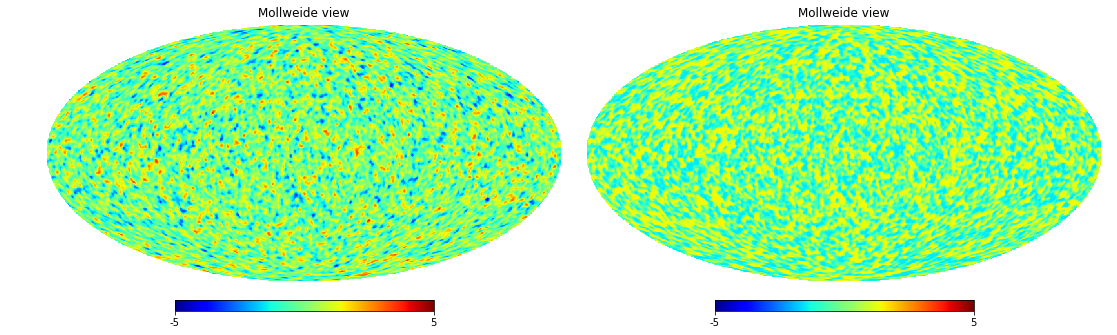

1.00236960521
1.00236960521


In [28]:
print('Gaussian variance',np.var(fgauss))
print('Uniform variance',np.var(maybe))
plt.figure(figsize=[15,5])
plt.clf()
hp.mollview(fgauss,sub=121,min=-5,max=5)
hp.mollview(maybe-maybe.mean(),sub=122,min=-5,max=5)
plt.show()
print(np.var(fgauss))
print(np.var(maybe))

In [29]:
def Cl(mp):
    return hp.alm2cl(hp.map2alm(mp))
cl_fgauss = Cl(fgauss)
cl_maybe = Cl(maybe)
print(ell.shape)
print(cl_fgauss.shape)

(768,)
(768,)


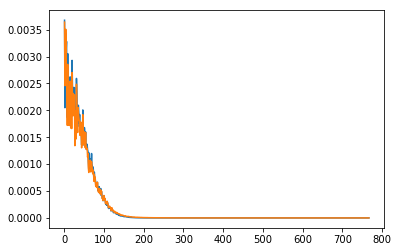

In [30]:
# Fairly similar resulting power spectra, but different pixel distributions.
plt.figure()
plt.clf()
plt.plot(ell[1:],cl_fgauss[1:])
plt.plot(ell[1:],cl_maybe[1:])
plt.show()

In [72]:
# Let's try random a_lm
l,m = hp.Alm.getlm(lmax)
filt = C_l[np.array(l,dtype='int64')] # Assign the cl to filter the appropriate l
#alm_gauss = np.random.randn(len(l))+1j*np.random.randn(len(l))
#alm_gauss = np.random.uniform(size=len(l))+1j*np.random.uniform(size=len(l))
#falm_gauss = filt*alm_gauss
falm = filt*np.exp(-np.pi*1j*np.cos(m/767.)) #np.random.uniform(size=len(l))/((l+1)/20.))
map_from_alm = hp.alm2map(falm,int(nside),lmax=int(lmax))

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


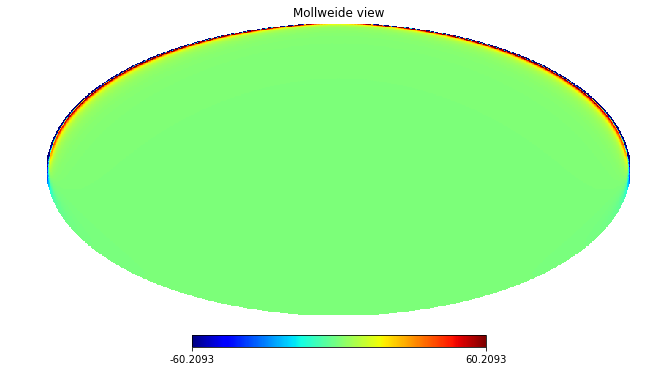

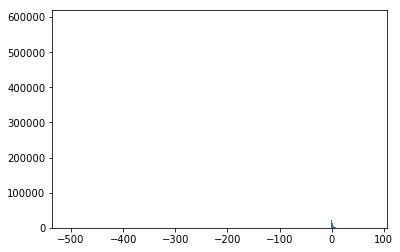

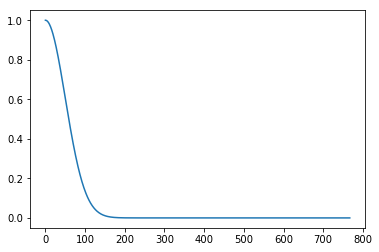

In [73]:
hp.mollview(map_from_alm-map_from_alm.mean(),min=-3*np.std(map_from_alm),max=3.*np.std(map_from_alm))
plt.show()
plt.hist(map_from_alm,bins=1000)
plt.show()
plt.plot(Cl(map_from_alm))
plt.show()

In [44]:
np.random.uniform?

In [56]:
l.max()

767.0